<a href="https://colab.research.google.com/github/khemthung/MADT8101-Customer-analytics/blob/main/Class_2_Customer_Insight_Supermarket_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer insight supermarket

In [9]:
# install.packages('highcharter')
# install.packages('highcharter', repos='http://cran.rstudio.com/')
install.packages('factoextra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(dplyr)
library(tidyr)
library(stringr)
library(data.table)
library(readr)
library(lubridate)

library(ggplot2)
library(factoextra)
#library(highcharter)


In [11]:
# Getting file from github
github_url <- 'https://raw.githubusercontent.com/khemthung/MADT8101-Customer-analytics/main/Homework%2002%20-%20Build%20Customer%20Single%20View%20%26%20Basic%20Customer%20Analytic/raw_data/supermarket.csv'
df <- read_csv(github_url)

Rows: 578082 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): PROD_CODE, PROD_CODE_10, PROD_CODE_20, PROD_CODE_30, PROD_CODE_40,...
dbl  (7): SHOP_WEEK, SHOP_DATE, SHOP_WEEKDAY, SHOP_HOUR, QUANTITY, SPEND, BA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Understanding

In [12]:
glimpse(df)
summary(df)

Rows: 578,082
Columns: 22
$ SHOP_WEEK                <dbl> 200734, 200805, 200716, 200815, 200626, 20065…
$ SHOP_DATE                <dbl> 20071019, 20080328, 20070612, 20080604, 20060…
$ SHOP_WEEKDAY             <dbl> 6, 6, 3, 4, 5, 3, 5, 5, 1, 5, 2, 6, 3, 3, 5, …
$ SHOP_HOUR                <dbl> 8, 21, 9, 10, 16, 13, 14, 12, 14, 18, 15, 11,…
$ QUANTITY                 <dbl> 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1, …
$ SPEND                    <dbl> 9.50, 1.49, 0.86, 0.90, 1.77, 3.60, 1.43, 0.4…
$ PROD_CODE                <chr> "PRD0901335", "PRD0901120", "PRD0900963", "PR…
$ PROD_CODE_10             <chr> "CL00058", "CL00162", "CL00248", "CL00248", "…
$ PROD_CODE_20             <chr> "DEP00016", "DEP00055", "DEP00089", "DEP00089…
$ PROD_CODE_30             <chr> "G00006", "G00016", "G00030", "G00030", "G000…
$ PROD_CODE_40             <chr> "D00002", "D00003", "D00009", "D00009", "D000…
$ CUST_CODE                <chr> "CUST0000804514", "CUST0000735558", NA, NA, N…
$ CUST_PRICE_S

   SHOP_WEEK        SHOP_DATE         SHOP_WEEKDAY     SHOP_HOUR    
 Min.   :200607   Min.   :20060410   Min.   :1.000   Min.   : 8.00  
 1st Qu.:200639   1st Qu.:20061120   1st Qu.:2.000   1st Qu.:12.00  
 Median :200715   Median :20070605   Median :4.000   Median :15.00  
 Mean   :200704   Mean   :20069905   Mean   :3.991   Mean   :15.05  
 3rd Qu.:200743   3rd Qu.:20071217   3rd Qu.:6.000   3rd Qu.:18.00  
 Max.   :200819   Max.   :20080706   Max.   :7.000   Max.   :21.00  
    QUANTITY           SPEND          PROD_CODE         PROD_CODE_10      
 Min.   :  1.000   Min.   :  0.010   Length:578082      Length:578082     
 1st Qu.:  1.000   1st Qu.:  0.770   Class :character   Class :character  
 Median :  1.000   Median :  1.240   Mode  :character   Mode  :character  
 Mean   :  1.532   Mean   :  1.934                                        
 3rd Qu.:  1.000   3rd Qu.:  2.110                                        
 Max.   :129.000   Max.   :476.160                                 

In [13]:
tail(df)

SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,⋯,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
200646,20070109,3,10,1,0.01,PRD0903678,CL00222,DEP00076,G00023,⋯,UM,YA,9.941040e+14,M,MM,Small Shop,Fresh,STORE00001,LS,E02
200738,20071116,6,12,1,0.01,PRD0903678,CL00222,DEP00076,G00023,⋯,UM,NA,9.941084e+14,S,MM,Small Shop,Grocery,STORE00001,LS,E02
200716,20070612,3,12,1,13.76,PRD0902312,CL00230,DEP00081,G00027,⋯,UM,OA,9.941062e+14,L,UM,Top Up,Fresh,STORE00001,LS,E02
200637,20061109,5,16,1,4.47,PRD0900396,CL00229,DEP00081,G00027,⋯,UM,NA,9.941031e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02
200717,20070624,1,10,1,4.92,PRD0903065,CL00229,DEP00081,G00027,⋯,UM,YF,9.941063e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02
200744,20071229,7,14,1,9.27,PRD0901923,CL00229,DEP00081,G00027,⋯,UM,NA,9.941090e+14,L,MM,Top Up,Mixed,STORE00001,LS,E02


## Data cleaning & validating
- clear null (fill na)

In [14]:
# na columns
colSums(is.na(df))

SHOP_WEEK                SHOP_DATE             SHOP_WEEKDAY 
                       0                        0                        0 
               SHOP_HOUR                 QUANTITY                    SPEND 
                       0                        0                        0 
               PROD_CODE             PROD_CODE_10             PROD_CODE_20 
                       0                        0                        0 
            PROD_CODE_30             PROD_CODE_40                CUST_CODE 
                       0                        0                    85588 
  CUST_PRICE_SENSITIVITY           CUST_LIFESTAGE                BASKET_ID 
                   85588                   144940                        0 
             BASKET_SIZE BASKET_PRICE_SENSITIVITY              BASKET_TYPE 
                       0                        0                        0 
 BASKET_DOMINANT_MISSION               STORE_CODE             STORE_FORMAT 
                       0                        0                        0 
            STORE_REGION 
                       0

In [15]:
# view only column that got na
which(colSums(is.na(df))>0)

CUST_CODE CUST_PRICE_SENSITIVITY         CUST_LIFESTAGE 
                    12                     13                     14

In [16]:
# fill na = none
df$CUST_CODE <- replace_na(df$CUST_CODE,'none')
df$CUST_PRICE_SENSITIVITY <- replace_na(df$CUST_PRICE_SENSITIVITY,'none')
df$CUST_LIFESTAGE <- replace_na(df$CUST_LIFESTAGE,'none')

In [17]:
#lubidate

## Quick business question
- New vs Existing customer (Users)
- Total spending (Values)

In [18]:
# labeling non and existing customer
df <- df %>% mutate( customer_type = case_when(
    CUST_CODE == "none" ~ "none_customer",
    TRUE ~ "existing_customer"))

In [19]:
#df <- df %>% select(-customer_type)

In [20]:
# quick view table
user_tb <- df %>% group_by(customer_type) %>%
  summarise(users = n_distinct(CUST_CODE),
            transation = n_distinct(BASKET_ID),
            spending = sum(SPEND),
            avg_bill_value = n_distinct(BASKET_ID)/sum(SPEND),
            qty_per_order = sum(QUANTITY) / n_distinct(BASKET_ID)
            )

user_tb$spd_percentage <- (user_tb$spending / sum(user_tb$spending)) * 100

user_tb

customer_type,users,transation,spending,avg_bill_value,qty_per_order,spd_percentage
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
existing_customer,3439,65159,949467.9,0.06862686,11.54642,84.93102
none_customer,1,12075,168460.4,0.07167857,11.02642,15.06898


In [21]:
# pie plot customer type value
pie_chart <-  ggplot(user_tb, aes(x = "", y = spd_percentage, fill = customer_type)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") + theme_void() +
  geom_text(aes(label = paste0(round(spd_percentage, 1), "%")), size = 5) +
  scale_fill_brewer(palette = "Set3")

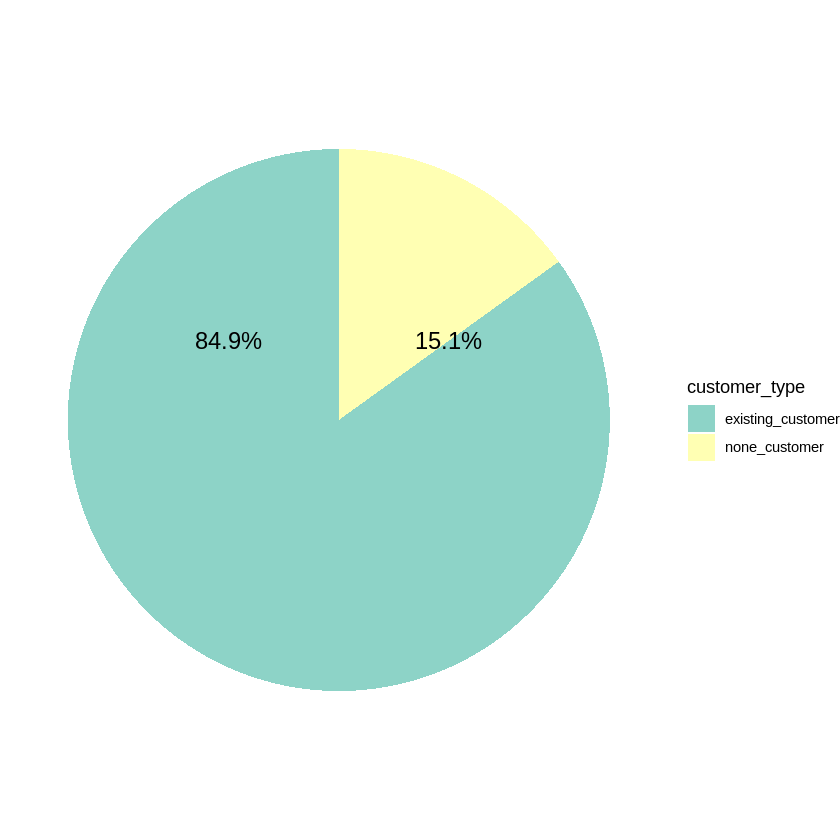

In [22]:
print(pie_chart)

## Data profiling
**Objectives**
- to identify customer behavioural segmentation (to exisiting customer)
- to provide product class ionsights, relecant customer insights

**Features selection for customer single view** (need to prep data as following)

  - **customers code:** customer unique number
  - **transaction:** users' purchase times or frequency
  - **total spend:** total spending per user
  - **avg_spend:** on that purchase spending per basket per user
  - **qty_per_order:** no. of product per transaction
  - **started date:** 1st data customer register
  - **last date:** last purchase date
  - **mean time between purchase:** calculated from *((start_date - last_date)/pruchase_frequency)*
  - **lifetime:** calculated from  *(today(lastest of data) - registered date)*
  - **customer life time value CLTV:** lifetime miltiplied by average transaction per user

  - **one-hot encoding 4 categories aspect:**
    - basket size (S,M,L)
    - price sebsitivity
    - basket type (Small-shop, Top-up, Full-shop, Unknown)
    - dominant product per transaction (Fresh, Mixed, Grocery, Nonfood)

In [23]:
# adjusting the date format
df$order_date <- ymd(df$SHOP_DATE)

In [24]:
# customer single view table (feature selection prep)
user_tb <- df %>% group_by(CUST_CODE,customer_type) %>%
  summarise(transactions = n_distinct(BASKET_ID),
            total_spend = sum(SPEND),
            avg_bill_value = sum(SPEND)/n_distinct(BASKET_ID),
            qty_per_order = sum(QUANTITY) / n_distinct(BASKET_ID),
            start_date = min(order_date),
            last_date = max(order_date),
            mtbp = as.numeric(interval(min(order_date),max(order_date)),"days") / n_distinct(BASKET_ID),
            life_time = as.numeric(interval(min(order_date),ymd('2008-07-10')),"days"),
            cltv = as.numeric(interval(min(order_date),ymd('2008-07-10')),"days")*(sum(SPEND)/n_distinct(BASKET_ID)),
            basket_size_s = n_distinct(BASKET_ID[BASKET_SIZE == "S"])/n_distinct(BASKET_ID),
            basket_size_m = n_distinct(BASKET_ID[BASKET_SIZE == "M"])/n_distinct(BASKET_ID),
            basket_size_l = n_distinct(BASKET_ID[BASKET_SIZE == "L"])/n_distinct(BASKET_ID),
            basket_price_sensitivity_la = n_distinct(BASKET_ID[BASKET_PRICE_SENSITIVITY == "LA"])/n_distinct(BASKET_ID),
            basket_price_sensitivity_mm = n_distinct(BASKET_ID[BASKET_PRICE_SENSITIVITY == "MM"])/n_distinct(BASKET_ID),
            basket_price_sensitivity_um = n_distinct(BASKET_ID[BASKET_PRICE_SENSITIVITY == "UM"])/n_distinct(BASKET_ID),
            basket_price_sensitivity_na = n_distinct(BASKET_ID[BASKET_PRICE_SENSITIVITY == "XX"])/n_distinct(BASKET_ID),
            basket_type_smallshop = n_distinct(BASKET_ID[BASKET_TYPE == "Small Shop"])/n_distinct(BASKET_ID),
            basket_type_topup = n_distinct(BASKET_ID[BASKET_TYPE == "Top Up"])/n_distinct(BASKET_ID),
            basket_type_fullshop = n_distinct(BASKET_ID[BASKET_TYPE == "Full Shop"])/n_distinct(BASKET_ID),
            basket_type_na = n_distinct(BASKET_ID[BASKET_TYPE == "XX"])/n_distinct(BASKET_ID),
            basket_dominant_fresh = n_distinct(BASKET_ID[BASKET_DOMINANT_MISSION == "Fresh"])/n_distinct(BASKET_ID),
            basket_dominant_mixed = n_distinct(BASKET_ID[BASKET_DOMINANT_MISSION == "Mixed"])/n_distinct(BASKET_ID),
            basket_dominant_grocery = n_distinct(BASKET_ID[BASKET_DOMINANT_MISSION == "Grocery"])/n_distinct(BASKET_ID),
            basket_dominant_nonfood = n_distinct(BASKET_ID[BASKET_DOMINANT_MISSION == "Nonfood"])/n_distinct(BASKET_ID)
            )

`summarise()` has grouped output by 'CUST_CODE'. You can override using the
`.groups` argument.


In [25]:
#select only existing customer
user_tb <- user_tb %>% filter(customer_type == 'existing_customer')

tail(user_tb)

CUST_CODE,customer_type,transactions,total_spend,avg_bill_value,qty_per_order,start_date,last_date,mtbp,life_time,⋯,basket_price_sensitivity_um,basket_price_sensitivity_na,basket_type_smallshop,basket_type_topup,basket_type_fullshop,basket_type_na,basket_dominant_fresh,basket_dominant_mixed,basket_dominant_grocery,basket_dominant_nonfood
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<date>,<date>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CUST0000999109,existing_customer,3,7.87,2.623333,3.666667,2007-03-02,2007-06-26,38.66667,496,⋯,0.00000000,0.00000000,0.6666667,0.3333333,0.0000000,0.00000000,0.6666667,0.0000000,0.3333333,0.00000000
CUST0000999439,existing_customer,10,43.60,4.360000,1.500000,2006-05-28,2008-07-05,76.90000,774,⋯,0.00000000,0.50000000,0.5000000,0.0000000,0.0000000,0.50000000,0.0000000,0.1000000,0.4000000,0.00000000
CUST0000999544,existing_customer,1,6.32,6.320000,1.000000,2007-03-23,2007-03-23,0.00000,475,⋯,0.00000000,0.00000000,1.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,1.00000000
CUST0000999593,existing_customer,30,453.58,15.119333,13.166667,2006-05-06,2008-04-02,23.23333,796,⋯,0.06666667,0.00000000,0.2333333,0.5333333,0.2333333,0.00000000,0.4666667,0.3333333,0.1666667,0.03333333
CUST0000999935,existing_customer,21,444.17,21.150952,16.333333,2006-11-29,2008-06-05,26.38095,589,⋯,0.00000000,0.04761905,0.3809524,0.1904762,0.3809524,0.04761905,0.3333333,0.3333333,0.2380952,0.04761905
CUST0000999936,existing_customer,6,17.67,2.945000,3.500000,2006-08-03,2008-04-17,103.83333,707,⋯,0.16666667,0.00000000,0.8333333,0.1666667,0.0000000,0.00000000,0.5000000,0.1666667,0.3333333,0.00000000


## K-mean Clustering

- using all features to create clustering groups
  1. Select features and Standardize
  2. Choosing K number of clusters with Elbow Method
  3. Run K-means clustering

```
# This is formatted as code
```

, Fit & Predict the model
  4. Result view


In [26]:
# Selected features (only numeric)
df_features <- user_tb %>% select(
  transactions, total_spend, avg_bill_value, qty_per_order
  ,mtbp ,life_time ,cltv ,basket_size_s ,basket_size_m ,basket_size_l
  ,basket_price_sensitivity_la ,basket_price_sensitivity_mm ,basket_price_sensitivity_um
  ,basket_price_sensitivity_na ,basket_type_smallshop ,basket_type_topup
  ,basket_type_fullshop ,basket_type_na ,basket_dominant_fresh
  ,basket_dominant_mixed ,basket_dominant_grocery ,basket_dominant_nonfood
  )

# set cust_id as index and drop <chr> out
rownames(df_features) <- df_features$CUST_CODE
df_features$CUST_CODE <- NULL

Adding missing grouping variables: `CUST_CODE`
Warning message:
“Setting row names on a tibble is deprecated.”


In [27]:
# Standardize the features
## cause all the feature scale are not the same, so we scale all variables

df_features_s <- df_features %>% mutate_all(~(scale(.) %>% as.vector))


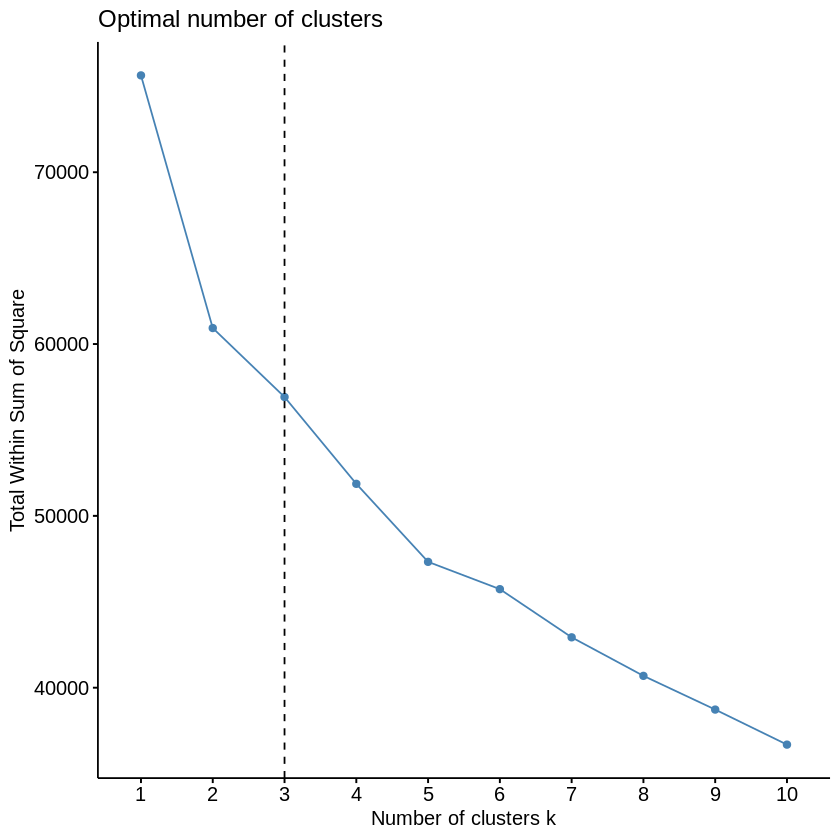

In [30]:
# Elbow method
fviz_nbclust(df_features_s, kmeans, method = "wss") + geom_vline(xintercept = 3, linetype = 2)

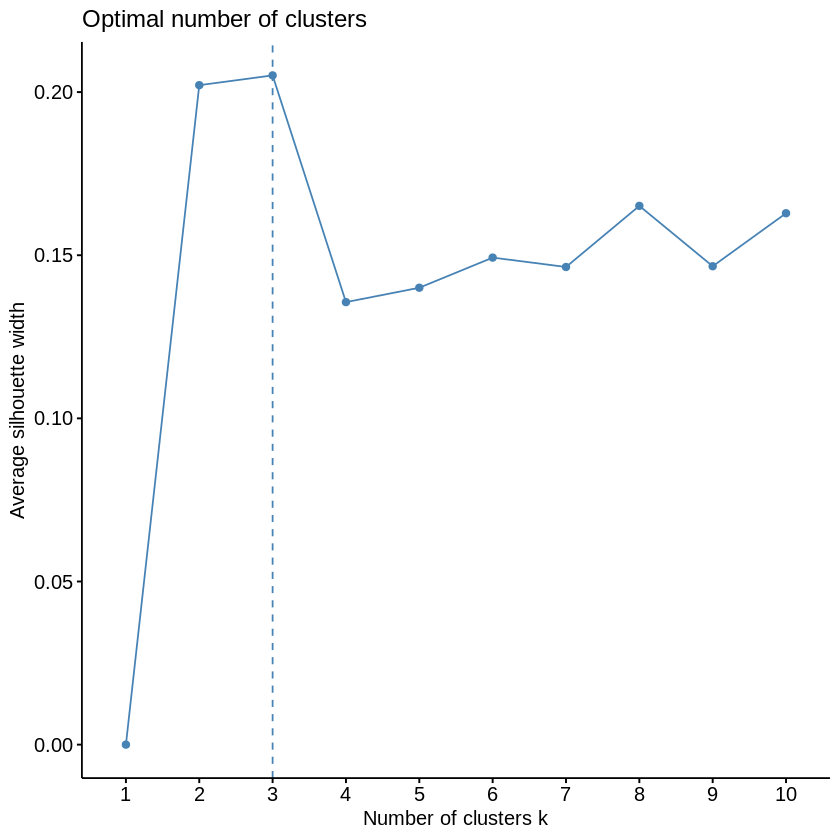

In [31]:
# silhouette score
fviz_nbclust(df_features_s, kmeans, method = "silhouette")

In [78]:
# useing k-means with cluster 3

kmean <- kmeans(df_features_s, 3)
kmean$centers

,transactions,total_spend,avg_bill_value,qty_per_order,mtbp,life_time,cltv,basket_size_s,basket_size_m,basket_size_l,⋯,basket_price_sensitivity_um,basket_price_sensitivity_na,basket_type_smallshop,basket_type_topup,basket_type_fullshop,basket_type_na,basket_dominant_fresh,basket_dominant_mixed,basket_dominant_grocery,basket_dominant_nonfood
1,0.27111006,0.5744443,1.0243527,1.1274332,-0.079010825,0.1798638,1.0006019,-0.7485137,-0.5800030,1.3359685,⋯,0.05006232,-0.15099834,-1.1484320,0.64633113,1.000206,-0.1013250448,-0.01254758,0.61723379,-0.3550874,-0.24743037
2,0.01851855,-0.1561358,-0.2792621,-0.3090004,0.056946335,0.1286348,-0.2548941,-0.2588446,0.7041800,-0.3902522,⋯,0.29803561,-0.04580434,0.1833608,0.06523973,-0.374020,0.0006648089,0.31952830,-0.04203021,-0.2506869,-0.09924592
3,-0.31358227,-0.3678255,-0.6546339,-0.7180256,-0.003259154,-0.3846792,-0.6666201,1.1811253,-0.4583469,-0.8142506,⋯,-0.50518303,0.22853403,0.9308791,-0.77960567,-0.485349,0.1056818742,-0.47188695,-0.58611308,0.7544785,0.41120658


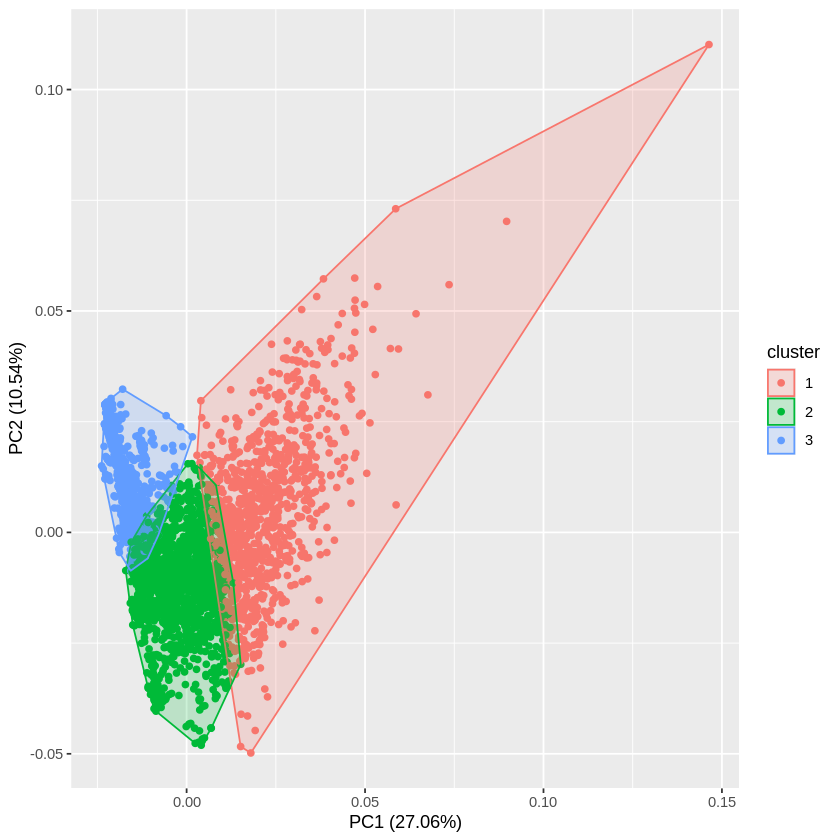

In [79]:
# Plot cluster with 3 groups

autoplot(kmean, df_features_s, frame = TRUE)

In [ ]:
# apply the cluster label back


##### old lib (for testing)

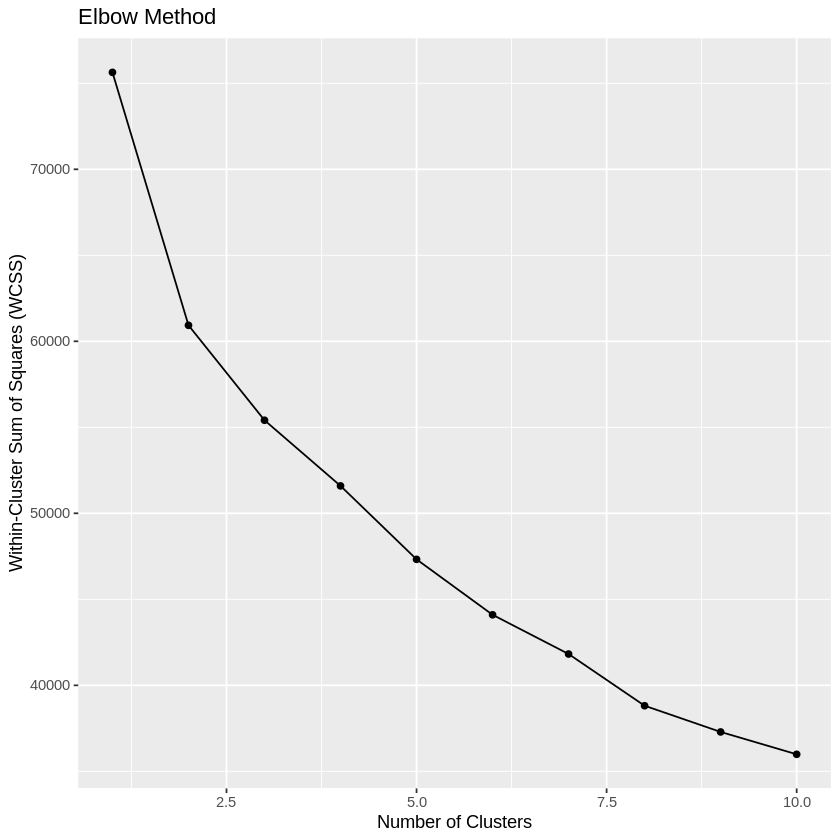

In [75]:
  library(cluster)

# Decide the number of clusters to choose with Elbow point method
  max_clusters <- 10

# Initialize an empty vector to store the WCSS values
  wcss <- vector("numeric", max_clusters)

# Compute WCSS for different numbers of clusters
  for (k in 1:max_clusters) {
    kmeans_model <- kmeans(df_features_s, centers = k, nstart = 10)
    wcss[k] <- kmeans_model$tot.withinss
  }

# Plot the WCSS values against the number of clusters
  elbow_plot <- ggplot(data.frame(x = 1:max_clusters, y = wcss), aes(x, y)) +
    geom_line() +
    geom_point() +
    labs(x = "Number of Clusters", y = "Within-Cluster Sum of Squares (WCSS)") +
    ggtitle("Elbow Method") # + scale_y_continuous(labels = function(x) format(x, big.mark = ",", scientific = FALSE))

  print(elbow_plot)

## Result interpretation
- after getting groups and labling the users we now need to view group characteristic